In [1]:
from outliers.multi_columns import train_isolation_forest
from outliers.multi_columns import get_anomaly_and_score, get_outliers_index, plot_anomaly_pca
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')

data = pd.read_csv('../data/data_demo.csv')

data.head()

,rooms,garages,useful_area,value,interior_quality,time_on_market,has_outlier
0,3.0,1.0,105.0,1038640.0,2,31.787079,0
1,3.0,2.0,76.0,606405.0,4,209.468842,0
2,3.0,1.0,123.0,1534500.0,1,38.000000,0
3,3.0,2.0,180.0,1131950.0,5,154.000000,0
4,3.0,1.0,67.0,452672.0,4,15.000000,0


In [2]:
features = ['rooms','garages','useful_area','value','interior_quality','time_on_market']

#Train isolation forest
clf = train_isolation_forest(data, features)

#Update DataFrame with outlier label and anomaly score
data = get_anomaly_and_score(data, features, clf)

#Get outlier index, not oultier index and number of anomalies
outlier_index, clean_index = get_outliers_index(data, mode = 'normal', threshold = -0.5 , percent = 0.5)
print(data['anomaly'].value_counts())

 1    8412
-1     557
Name: anomaly, dtype: int64


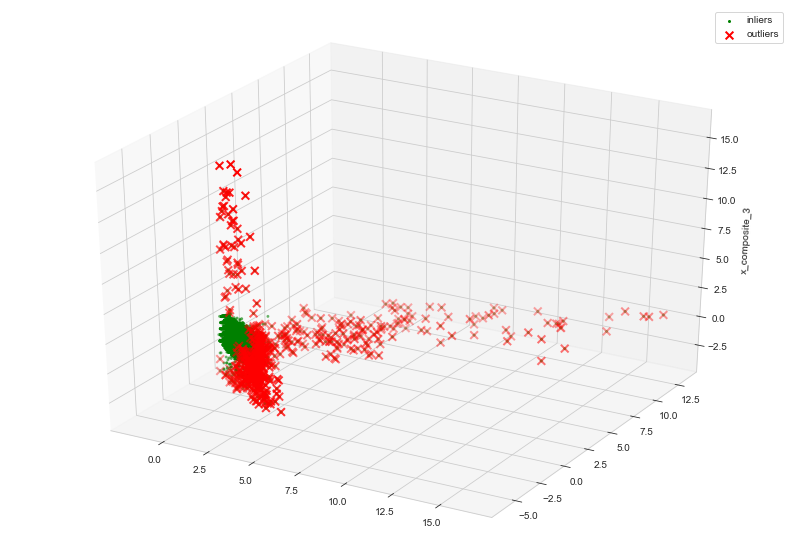

In [3]:
plot_anomaly_pca(data, features, outlier_index, clean_index,mode = '3D')

# Get more conservative anomalies

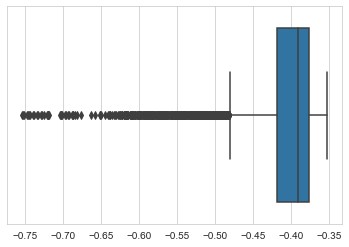

In [4]:
X_train = data[features]


sns.boxplot(clf.score_samples(X_train))

In [5]:
outlier_index, clean_index = get_outliers_index(data, mode = 'threshold', threshold = -0.55)

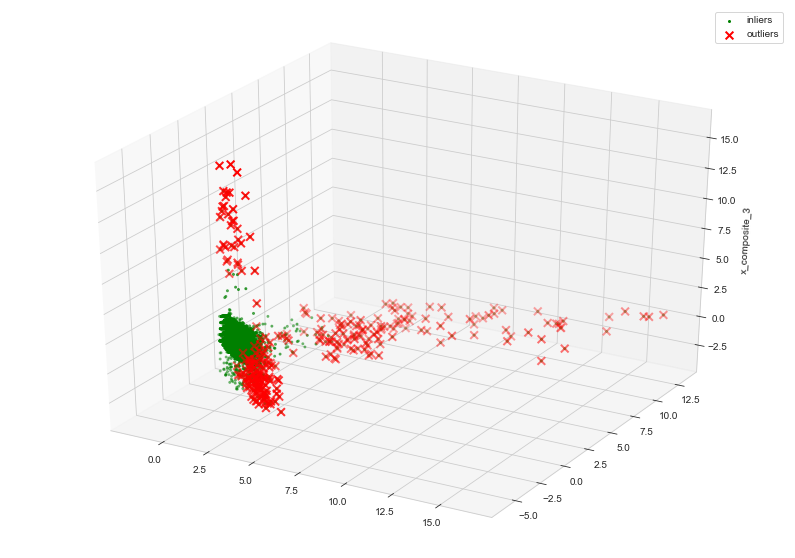

In [6]:
plot_anomaly_pca(data, features, outlier_index, clean_index, mode = '3D')

In [7]:
outlier_index, clean_index = get_outliers_index(data, mode = 'threshold', threshold = -0.6)

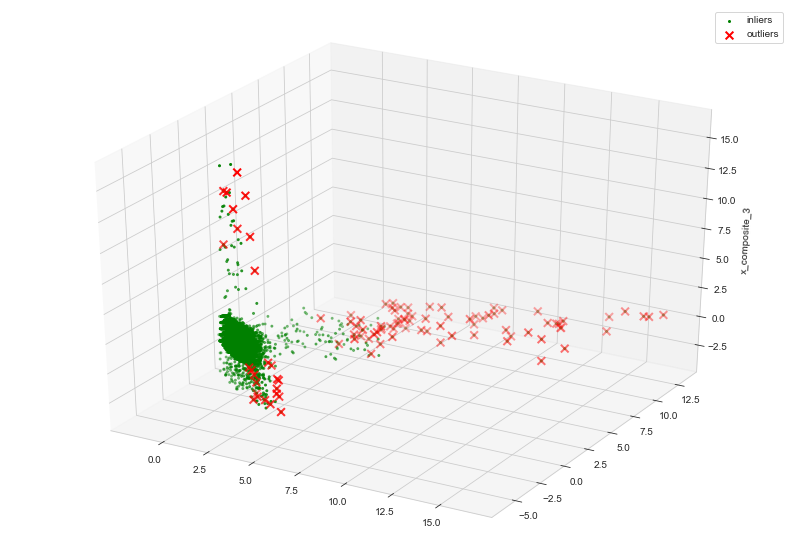

In [8]:
plot_anomaly_pca(data, features, outlier_index, clean_index, mode = '3D')

# Get a percent of most anomalous values

In [9]:
outlier_index, clean_index = get_outliers_index(data, mode = 'percent', percent = 0.5)

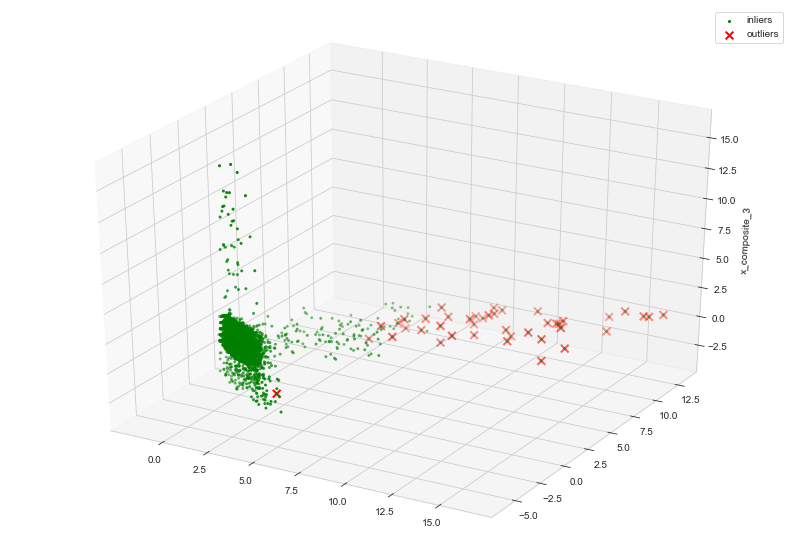

In [10]:
plot_anomaly_pca(data, features, outlier_index, clean_index, mode = '3D')